In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import common.util as util
from common.EstimatedPdf import EstimatedPdf
from common.Pmf import Pmf
from c6.Player import Player

In [2]:
df_data = util.read_showcases("./data/showcases.2011.csv")

In [3]:
prices_1 = df_data.loc[:, "Showcase 1"]
bids_1 = df_data.loc[:, "Bid 1"]
diffs_1 = df_data.loc[:, "Difference 1"]
prices_2 = df_data.loc[:, "Showcase 2"]
bids_2 = df_data.loc[:, "Bid 2"]
diffs_2 = df_data.loc[:, "Difference 2"]

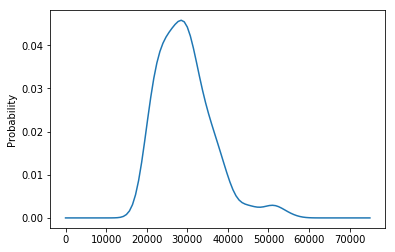

In [4]:
pdf = EstimatedPdf(prices_1)
low, high = 0, 75000
n = 101
xs = np.linspace(low, high, n)
pmf = pdf.make_pmf(xs)
pmf.plot()

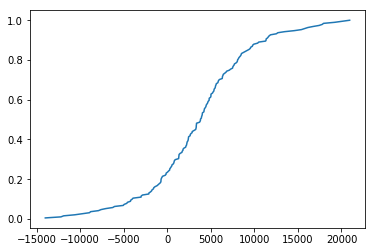

In [5]:
cdf = util.make_cdf_from_list(diffs_1)
cdf.plot()

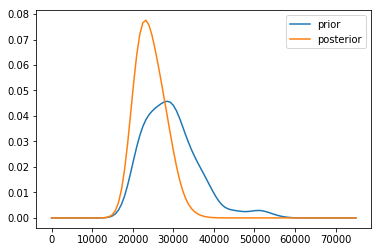

In [6]:
player_1 = Player(prices_1, bids_1, diffs_1)
player_1.make_beliefs(20000)
player_1.plot()

In [7]:
player_1 = Player(prices_1, bids_1, diffs_1)
player_2 = Player(prices_2, bids_2, diffs_2)
bids_1, gains_1 = player_1.calc_bid_gain(20000, player_2)

In [8]:
player_1 = Player(prices_1, bids_1, diffs_1)
player_2 = Player(prices_2, bids_2, diffs_2)
bids_2, gains_2 = player_2.calc_bid_gain(40000, player_1)

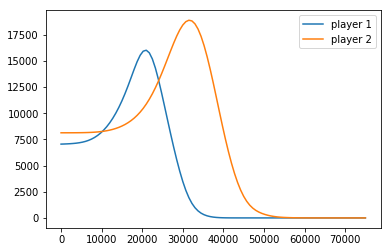

In [9]:
plt.figure()
plt.plot(bids_1, gains_1, label="player 1")
plt.plot(bids_2, gains_2, label="player 2")
plt.legend()